<a href="https://colab.research.google.com/github/L4ncelot1024/Learn_Deep_Learning_Le_Wagon/blob/main/Day1/00_PrepWorkBoston_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Review

This notebook is about running an end-to-end machine learning project on the dataset of housing in Boston. The task is to predict the price of a house using different crieria of the house. This project is very open, the idea is for you to go over the methods you've seen in the course and to apply them here. We suggest this step-by-step process:

1. Loading and identifying the data
2. Exploring the Data
3. Building your first Model
4. Evaluating your Model
5. Improving your Model


For each task, we list relevant items to go over but we let you code them as an exercise !


## 1. Loading and identifying the data

The dataset is available from a function in the `sklearn` package. You can find a description of its columns [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). First part is about checking everything is fine with the data and that you can manipulate it well. A simple look at each column, making sure you understand the information it holds, should be enough

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
%matplotlib inline

In [ ]:
boston_data = load_boston()
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
# Target is the price
df_boston['target'] = pd.Series(boston_data.target)

In [ ]:
print("shape of df: {}".format(df_boston.shape))
df_boston.head()

shape of df: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## 2. Exploring the Data

Now that you successfully loaded the data, it's time to have a first look at it !

We suggest to analyse each column to look for missing values, outlier... How should you deal with them?

Regarding the numerical column, check the distribution and check if it's informative w.r.t the quantity we want to predict, for instance you can use a 2d plot with the feature and y.

It's interesting also to look at the correlation matrix to check if some variables can be substitute to other.

## 2.1 Numerical column statistics and visualisation

In [ ]:

df_boston.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# YOUR CODE HERE
print("NaN values?")
for col in df_boston.columns:
  n = df_boston[col].isna().sum()
  print("{}: {}".format(col,n))

NaN values?
CRIM: 0
ZN: 0
INDUS: 0
CHAS: 0
NOX: 0
RM: 0
AGE: 0
DIS: 0
RAD: 0
TAX: 0
PTRATIO: 0
B: 0
LSTAT: 0
target: 0


## 2.1 Data Vizualization & Exploration

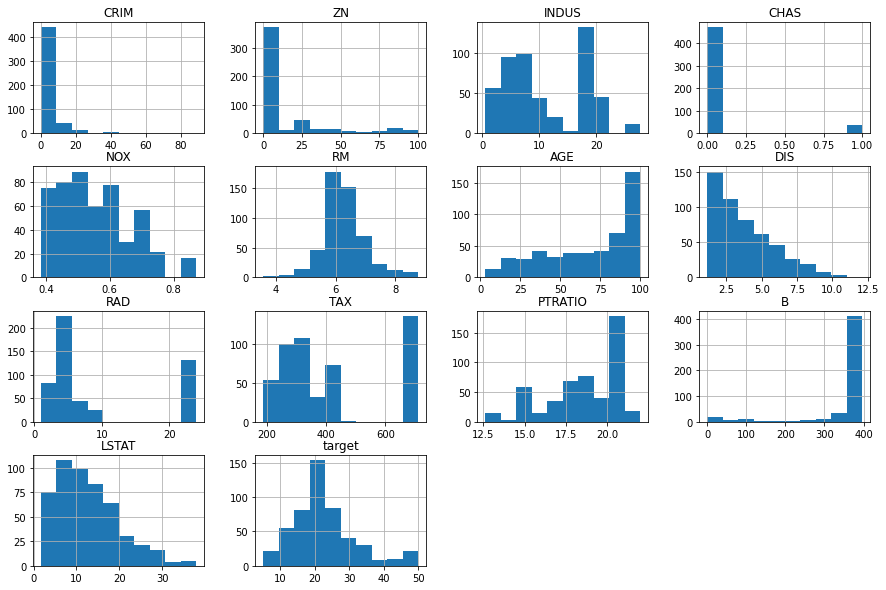

In [ ]:
df_boston.hist(figsize=(15,10))
plt.show()

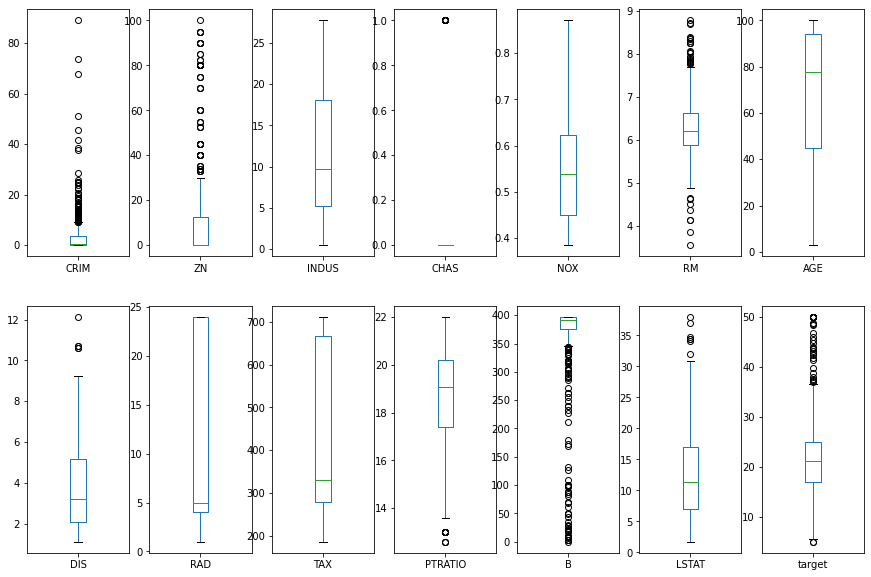

In [ ]:
fig, axes = plt.subplots(nrows=int(df_boston.shape[1]/7), ncols=7, figsize=(15,10)) # create 2x2 array of subplots

for col in df_boston.columns:
  df_boston.boxplot(column =[col], grid = False, ax=axes[int(df_boston.columns.get_loc(col)/7),df_boston.columns.get_loc(col)%7]) 

plt.show()

In [ ]:
#sns.pairplot(df_boston, height=2.5)
#plt.tight_layout()

## 2.3 Correlation

In [ ]:
# YOUR CODE HERE
cor_matrix = df_boston.corr()
df_boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


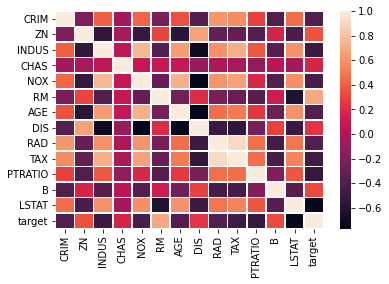

In [ ]:
ax = sns.heatmap(cor_matrix, linewidth=0.5)
plt.show()

## 2.4 Cleaning & features Selection

In [ ]:
df_boston_clean = df_boston.copy()
df_boston_clean = df_boston[df_boston['target']<50]
df_boston_clean = df_boston_clean[df_boston_clean['RM']!=8.78]
#keep_feat = ['CRIM','INDUS','RM','LSTAT','B','PTRATIO']
keep_feat = ['RM','LSTAT','PTRATIO']
excl_feat = [item for item in df_boston_clean.columns if item not in keep_feat]
features = df_boston_clean.drop(excl_feat, axis=1)
price = df_boston_clean['target']
features.head()
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 0 to 505
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   PTRATIO  489 non-null    float64
 2   LSTAT    489 non-null    float64
dtypes: float64(3)
memory usage: 15.3 KB


## 3. Building your first Model

Now that we identified the features and the quantity we want to predict (here the price of the house) we can build our first model. Just try out something simple for this task (wait ... is it a classification or a regression?)

In [ ]:
from sklearn.metrics import r2_score# Import 'train_test_split'
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn import linear_model
from random import randint
#import visuals as vs

#building pipelines (transformers & estimators)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numeric_features = features.select_dtypes(include=['int64', 'float64']).columns
categorical_features = features.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
        ,
        ('cat', categorical_transformer, categorical_features)])

estimators = [ ('linreg',linear_model.LinearRegression()) , ('ridge', linear_model.Ridge(alpha=.5)) , ( 'lasso', linear_model.Lasso(alpha=0.1)) , ('bayesian',linear_model.BayesianRidge()) ]

#split
x_train, x_test, Y_train, Y_test = train_test_split(features, price, test_size=0.2, random_state = 42)
#print(x_train, Y_train)

row_sample = randint(0,x_test.shape[0])
degree=3

for name, estimator in estimators:
  pipe = Pipeline(steps=[('preprocessor', preprocessor), ('poly',PolynomialFeatures(degree)),(name, estimator)])
  pipe.fit(x_train, Y_train)
  #y_pred = pipe.predict(x_test) 
  print(estimator)
  print("model score: %.2f" % pipe.score(x_test, Y_test))
  print("cross validation score {:.2f}".format(np.mean(cross_val_score(pipe, x_train, Y_train, cv=5))))
  print("prediction :") 
  x=x_test.iloc[[row_sample]]
  print(x)
  print("predicted price :${:.2f}".format(pipe.predict(x).squeeze()))
  print("observed price :${:.2f}".format(Y_test.iloc[row_sample]))
  print("\n")





LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
model score: 0.82
cross validation score 0.83
prediction :
       RM  PTRATIO  LSTAT
63  6.762     19.7    9.5
predicted price :$24.81
observed price :$25.00


Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
model score: 0.82
cross validation score 0.83
prediction :
       RM  PTRATIO  LSTAT
63  6.762     19.7    9.5
predicted price :$24.79
observed price :$25.00


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
model score: 0.82
cross validation score 0.83
prediction :
       RM  PTRATIO  LSTAT
63  6.762     19.7    9.5
predicted price :$24.06
observed price :$25.00


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, f

In [ ]:

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true (y_true) and predicted (y_predict) values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [ ]:

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state = 42)

## 4. Evaluating your Model

First thing to do once you have a model is to evaluate it (wait ... on which data?), `sklearn.metrics` contains a lot of function to do that [here](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [ ]:
# YOUR CODE HERE

## 5. Improving your Model

Now that you can build and evaluate one model, you should try to build the best one so apply the practical tricks you know to improve your model (e.g. cross validation, model selection between different models, feature selection ....)

In [ ]:
# YOUR CODE HERE

# Solution

<details>
  <summary>Solution</summary>
    
[Walkthrough to this dataset with code examples](https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d)
    
</details>